Hello! Let's explore some US bikeshare data! 

We have data for the following cities: 

Chicago 
New York City 
Washington

What city's do you want to explore?
all

Sorry, we do not have data for all, Please choose a city from either New York City, Chicago or Washington
What city's do you want to explore?
alla

Sorry, we do not have data for alla, Please choose a city from either New York City, Chicago or Washington
What city's do you want to explore?
washington

Nice! Lets explore data for Washington

What month do you want to explore? Please write the first three letters of the month's name
all
Lets explore Washington for the month of All

Which day of the week do you want to explore? Please write the first three letters of the day's name.
all
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Calculating The Most Frequent Times of Travel...

The most common month is: June


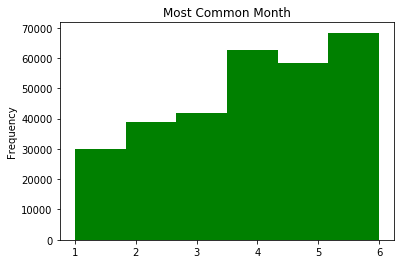



The most common day of the week is: Wednesday


The most common start hour is: 8


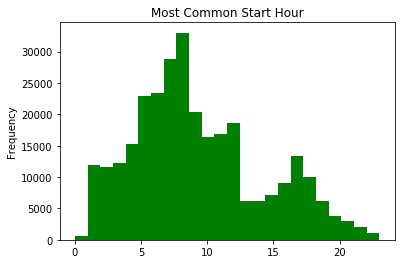


This took 0.8536007404327393 seconds.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Calculating The Most Popular Stations and Trip...

The most commonly used Start Station is: Columbus Circle / Union Station
The most commonly used End Station is: Columbus Circle / Union Station
The most requent combination of Start Station and End Station trip is: Jefferson Dr & 14th St SW to Jefferson Dr & 14...

This took 0.4404430389404297 seconds.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Calculating Trip Duration...

The total travel time is: 371183985.484
The mean of the travel time is: 1237.2799516133446

This took 0.004467964172363281 seconds.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Calculating User Stats...

There are 220786 Subscribers and 79214 Customers.

This took 0.3305397033691406 seconds.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unfortunately we don't have information on users' (Gender) and (Birth Year) for w

In [6]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data! \n\nWe have data for the following cities: \n\nChicago \nNew York City \nWashington\n')
    # get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    while True: 
        city = input ('What city\'s do you want to explore?\n').lower()
        if city.lower() not in CITY_DATA:
            print("\nSorry, we do not have data for {}, Please choose a city from either New York City, Chicago or Washington".format(city))
        else:
            print('\nNice! Lets explore data for {}\n'.format(city.title()))
            break

    # get user input for month (all, january, february, ... , june)
    while True: 
        month = input('What month do you want to explore? Please write the first three letters of the month\'s name\n').lower()
        if month.lower() not in ('all','jan','feb','mar','apr','may','jun'):
            print('\nSorry, we don\'t have data for {}. Our current dataset includes Jan, Feb, Mar, Apr, May, Jun. Please try again\n'.format(month).title())
        else:
            print('Lets explore {} for the month of {}\n'.format(city.title(), month.title()))
            break

    # get user input for day of week (all, monday, tuesday, ... sunday)
    while True: 
        day = input ('Which day of the week do you want to explore? Please write the first three letters of the day\'s name.\n').lower()
        if day.lower() not in ('all','mon','tue','wed','thu','fri','sat','sun'):
            print("Inocrect entry, please enter a correct day or type all for everyday of the week to explore")
        else:
            break
        

    print('+'*60)
    return city, month, day



def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """

    # load data file into a dataframe

    df = pd.read_csv(CITY_DATA[city])

    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])

    # extract month and day of week from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.weekday_name
    df['user_type'] = df['User Type']
    # filter by month if applicable
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun']
        month = months.index(month) + 1

        # filter by month to create the new dataframe
        df = df[df['month'] == month]

    # filter by day of week if applicable
    if day != 'all':
    # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == day.title()]

    return df

def on_demand(df):
    """Displays the first 5 colomns of the dataset base on user request"""
    x = 0
    y = 5
    while x< len(df.index):
        display = input("Would you like to see individual trips?""\nType 'yes', or 'no'").lower()
        if display == "yes":
            x = x+5
            y = y+5
            print(df.iloc[x:y])
        else:
            break

def time_stats(df):
    """Displays statistics on the most frequent times of travel.
       input = DataFrame generated from the load_data function. 
    """

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()
    
    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])
    # exctract month, day of the week and hour from the Start Time to creat new columns.  
    df['hour'] = df['Start Time'].dt.hour

    df['day_of_week'] = df['Start Time'].dt.weekday_name
    
    # display the most common month
    months ={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June'}
    most_common_month = months[df['month'].mode()[0]]
    print('The most common month is: {}'.format(most_common_month))
    #plot the most common month in a histogram. 
    df['month'].plot(kind='hist', bins=6, facecolor = 'g', title='Most Common Month')
    plt.show()
    
    # display the most common day of week
    most_common_day = df['day_of_week'].mode()[0]
    print('\n\nThe most common day of the week is: {}'.format(most_common_day))

    # display the most common start hour
    most_common_hour = df['hour'].mode()[0]
    print('\n\nThe most common start hour is: {}'.format(most_common_hour))
    #plot the most common hour in a histogram. 
    df['hour'].plot(kind='hist', bins=24, facecolor='g', title='Most Common Start Hour')
    plt.show()

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('+'*60)


def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()
  
    # display most commonly used start station
    common_start_station = df['Start Station'].mode().to_string(index=False)
    print('The most commonly used Start Station is: {}'.format(common_start_station))
    
    # display most commonly used end station
    common_end_station = df['End Station'].mode().to_string(index=False)
    print('The most commonly used End Station is: {}'.format(common_end_station))

    
    # display most frequent combination of start station and end station trip
    # first creat a new column combining the start and end stations
    df['Combination'] = df['Start Station'].str.cat(df['End Station'], sep=' to ')
    most_frequent_combination = df['Combination'].mode().to_string(index=False)
    print('The most requent combination of Start Station and End Station trip is: {}'.format(most_frequent_combination))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('+'*60)



def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # display total travel time
    total_travel_time = df['Trip Duration'].sum()
    print('The total travel time is: {}'.format(total_travel_time))
    
    # display mean travel time
    avg_travel_time = df['Trip Duration'].mean()
    print('The mean of the travel time is: {}'.format(avg_travel_time))
    
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('+'*60)



def user_stats(df):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # Display counts of user types
    subscriber = df.query('user_type == "Subscriber"').user_type.count()
    customer = df.query('user_type == "Customer"').user_type.count()
    print('There are {} Subscribers and {} Customers.'.format(subscriber, customer))
    
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('+'*60)
    
def user_birth(df):
    ''' Displays a breakdown of the user gender'''
    print('\nCalculating User Birth Information...\n')
    start_time = time.time()
    
    # Display earliest, most recent, and most common year of birth
    df['Birth Year'].plot(kind='hist', bins=30, facecolor='g', title='User Birth Year Distribution')
    plt.show()
    
    earliest_birth = int(df['Birth Year'].min())
    most_recent_birth = int(df['Birth Year'].max())
    most_common_birth = int(df['Birth Year'].mode())
    
    print('\nThe earliest birth year is: {}'.format(earliest_birth))
    print('\nThe most recent birth year is: {}'.format(most_recent_birth))
    print('\nThe most common brith year is: {}'.format(most_common_birth))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('+'*60)

def user_gender(df):
    ''' Displays a breakdown of the user gender'''
    print('\nCalculating User Gender...\n')
    start_time = time.time()
    
    # Display counts of gender
    male_count = df.query('Gender == "Male"').Gender.count()
    female_count = df.query('Gender == "Female"').Gender.count()
    print('There are {} males and {} females in the current selection'.format(male_count, female_count))
    
    
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('+'*60)

    

def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)
        if city != 'washington':
            user_gender(df)
            user_birth(df)
        else:
            print('Unfortunately we don\'t have information on users\' (Gender) and (Birth Year) for {}'.format(city.lower()))
        on_demand(df)
        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
	main()

